# Introduction to Scikit—Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.
What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow

In [4]:
# standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##  Getting our data ready to be used with machine learning.

Three main things we have to do.

 1. Split the data into features and labels(usually X and Y)
 2. Filling (also called imputing) or disregarding missing values.
 3. converting non -numerical values to numericak values(also called feature encoding) 

In [6]:
heart_disease = pd.read_csv("heart-disease.csv")

In [7]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# remove  target column
# axis =0 is row
# axis=1 os column
#Column X is data columns or input or feature columns
#column y is target column or output
#“X” are the variables we will use to predict/classify our “y” variable.
X = heart_disease.drop("target", axis =1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
# the X is usually denoted in capital letter
# the y is usually denoted in small case 
# https://stats.stackexchange.com/questions/389395/why-uppercase-for-x-and-lowercase-for-y

In [16]:
y = heart_disease["target"]

In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## The next thing we have to do is split data into training and test sets.

In [11]:
#The next thing we have to do is split data into training and test sets.

#So in machine learning, one of the most fundamental principles is never evaluate or test your models

#on data that it is learned from, which is why we split it into training and test sets.

In [19]:
# split the data into training and test sets
from sklearn .model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
heart_disease.shape, X.shape, y.shape


((303, 14), (303, 13), (303,))

In [24]:
#total 303 rows, 80% (242)of 303 is used for taining data and 20%(61)for test data.
X_train.shape,  y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

## Convert Categorical data into numbers and create a model

In [30]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [33]:
# create X an y(Price Column)
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#split into training and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [34]:
# build Machine Learning Model - this will produce error since data set contains string(Make, Color)
# eg: ValueError: could not convert string to float: 'Toyota'
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [35]:
# Convert Make, Color, doors categorical/String columns to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot_name", one_hot, categorical_features)], remainder="passthrough")

transaformed_X = transformer.fit_transform(X)
transaformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
#We chose categorical this time because although Doors is numerical (3, 4, 5), you can think of each of those numbers as a category.

#For example, cars with 3 Doors is a category, cars with 4 Doors is a category and the same for cars with 5 Doors.

#We treat them as categories so the model doesn't think 3 is less than 4 is less than 5 in a numerical sense. E.g. a car with 5 doors might be more than 1 door worth more expensive than a car with 4 doors.

In [36]:
pd.DataFrame(transaformed_X)
# the data in the int format are reained and all other colmns are converted into numbers

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


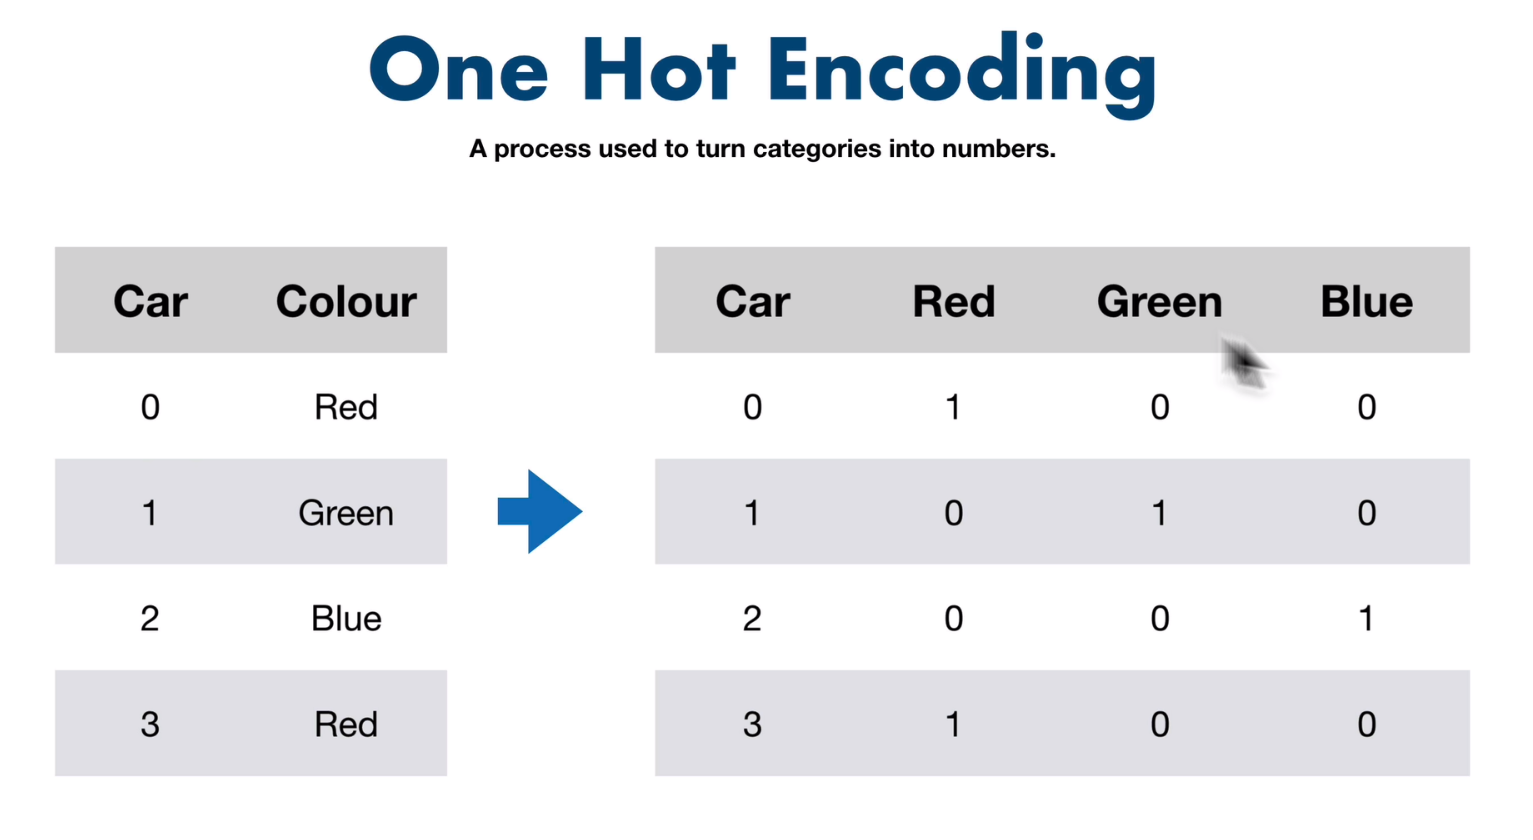

In [37]:
#Let's refit the model
#split into training and test data(20%) using transaformed_X
X_train, X_test, y_train, y_test = train_test_split(transaformed_X, y, test_size=0.2) 

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
model.score(X_test, y_test)

0.3123267902352711

# Handling missing values with Pandas

1. Fill them with some value(also known as imputation).
2. Remove the samples with missing data altogether

In a newer version of Scikit-Learn (0.23+), the OneHotEncoder class was upgraded to be able to handle None & NaN values. So these steps are no longer required.

## Option 1 : Fill missing values with scikit-Learn

In [10]:
# import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [11]:
# To find out how many missing values are there.
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [15]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [17]:
# Fill the missing "Make" column with text "missing"
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the missing "Colour" column with text "missing"
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the missing "Odometer" column with mean of the data
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the missing "Doors" column with 4
car_sales_missing["Doors"].fillna(4, inplace=True)

In [18]:
# To find out how many missing values are there. This should be zero
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [19]:
# Option 2: remove rows with missing price Value.
car_sales_missing.dropna(inplace=True)

In [20]:
# To find out how many missing values are there. This should be zero
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [13]:
from sklearn .model_selection import train_test_split

# create X an y(Price Column)
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

#split into training and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [14]:
# Convert Make, Color, doors categorical/String columns to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot_name", one_hot, categorical_features)], remainder="passthrough")

transaformed_X = transformer.fit_transform(X)
transaformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

##  Option2: Fill missing values with Scikit-Learn

In [23]:
car_sales_missing_scikit = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing_scikit.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [25]:
# Drop the rows without price
car_sales_missing_scikit.dropna(subset=["Price"], inplace=True)
car_sales_missing_scikit.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [27]:
#Fill missing values with Scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical values(Make, Color) with missing and numerical values(Door) with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer  
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                             ("door_imputer", door_imputer, door_features),
                             ("num_imputer", num_imputer, num_features)])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [30]:
filled_X_dataframe = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_dataframe.isna().sum()
# There should not be a missing data.

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot_name", one_hot, categorical_features)], remainder="passthrough")

transaformed_X = transformer.fit_transform(X)
transaformed_X

In [ ]:
from sklearn .model_selection import train_test_split

# create X an y(Price Column)
X = car_sales_missing_scikit.drop("Price", axis=1)
y = car_sales_missing_scikit["Price"]

#split into training and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# Choosing the right estimator/algorithm for your problem



https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note:

1. Sklearn refers to machine learning models and algorithms as estimators.
2. Classification problem - predicting a category (heart disease or not).
    a. Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
3. Regression problem - predicting a number (selling price of a car).
4. Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

If you know what kind of problem you're working with, one of the next places you should look at is the Scikit-Learn algorithm cheatsheet.

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


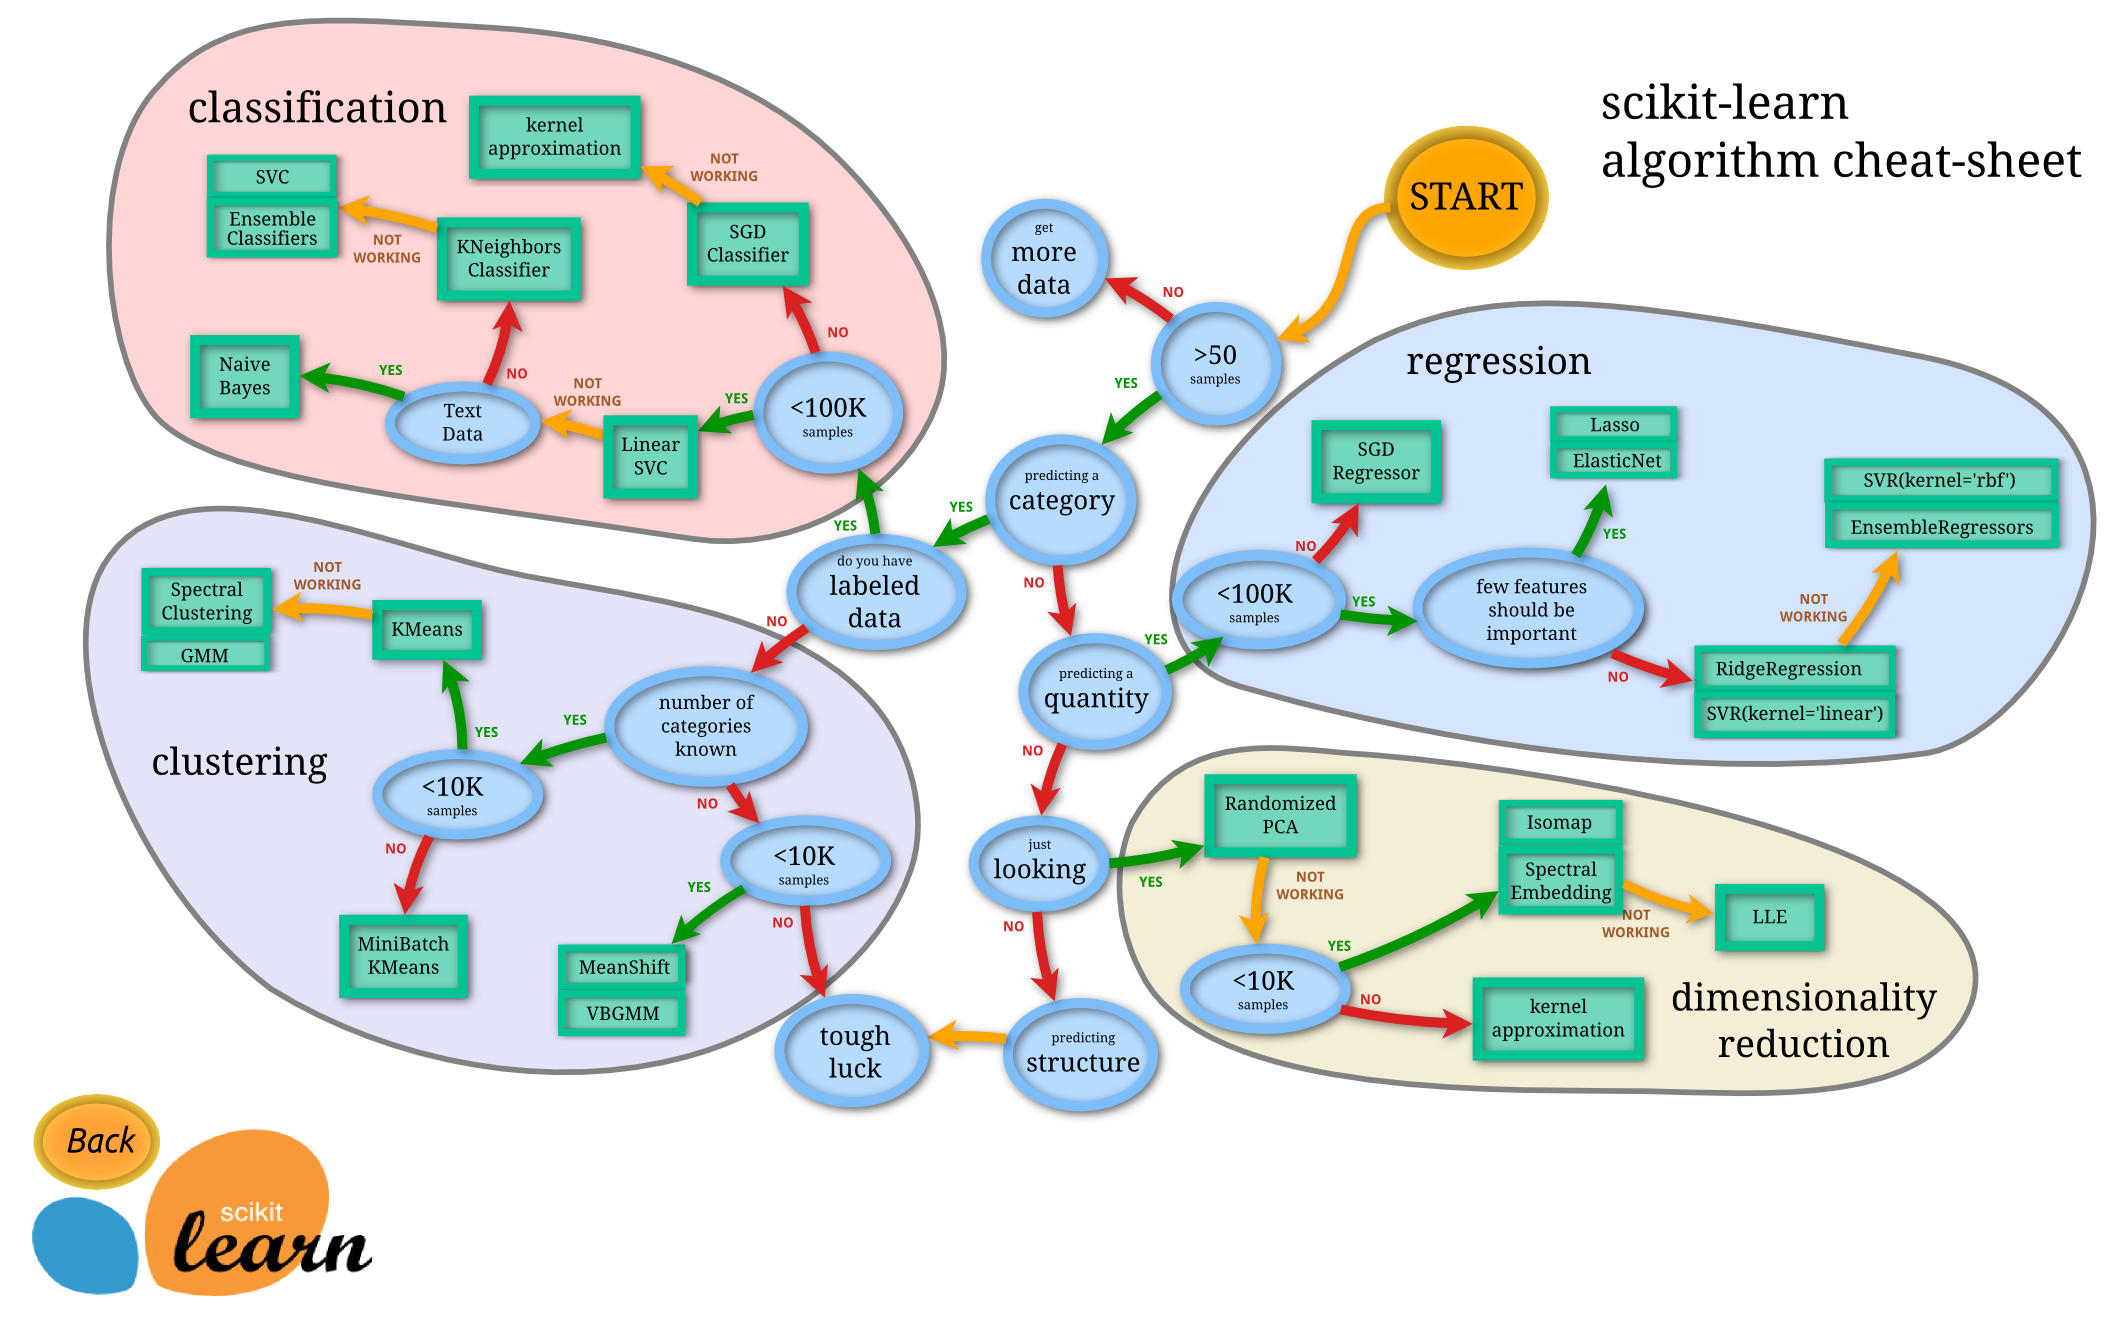

This cheatsheet gives you a bit of an insight into the algorithm you might want to use for the problem you're working on.

It's important to remember, you don't have to explicitly know what each algorithm is doing on the inside to start using them. If you do start to apply different algorithms but they don't seem to be working, that's when you'd start to look deeper into each one.

Let's check out the cheatsheet and follow it for some of the problems we're working on.

You can see it's split into four main categories. 

1. Regression, 
2. classification, 
3. clustering and 
3. dimensionality reduction. 

Each has their own different purpose but the Scikit-Learn team has designed the library so the workflows for each are relatively similar.

Let's start with a regression problem (trying to predict a number). We'll use the California Housing dataset built into Scikit-Learn's datasets module.

The goal of the California Housing dataset is to predict a given district's median house value (in hundreds of thousands of dollars) on things like the age of the home, the number of rooms, the number of bedrooms, number of people living the home and more.



# Picking a machine learning model for a regression problem

Regression analysis is a fundamental concept in the field of machine learning. 
It falls under supervised learning wherein the algorithm is trained with both input features and output labels. 
It helps in establishing a relationship among the variables by estimating how one variable affects the other. 

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html


In [32]:
# get California Housing dataset

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [33]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

In [34]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [35]:
# The target data is not part of the housing_df . get the target column from the dataset and add it to the 
 # housing_df as MedHouseVal.
# Name of the target = MedHouseVal 
# housing

housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


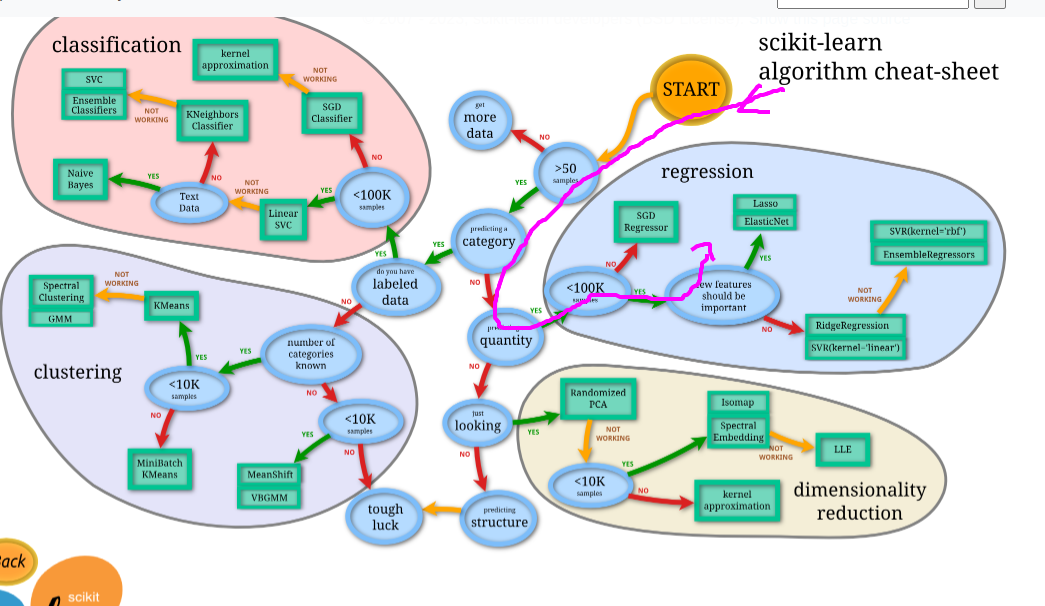

In [46]:
#Import lgoritm/estimator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

np.random.seed(42)

# create X an y(MedHouseVal Column)
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"] # Median house price in $100,000

#split into training and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


#Instantiate and fit the model(on the traininging set)
#Properties of data set
  #1. has more than than 50 samples
  #2. It is not predicting a category
  #3. It is predicticting a quatity like price
  #4. sample size < 100K

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5758549611440125

### What if "Ridge " didn't work or score didn't fit our needs?

###  Well, we could always try a different model

### How about a try an ensemble model.
    
    


In [47]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create X an y(MedHouseVal Column)
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"] # Median house price in $100,000

#split into training and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8066196804802649

# Choosing estimator for Classification problem


In [52]:
heart_disease = pd.read_csv("heart-disease.csv")

In [54]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [59]:
#Import  linearSVC estimator class
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# instantiate LinearSVC
clf = LinearSVC(max_iter=100000)
clf.fit(X_train, y_train)

#Evaluate LinearSVC
clf.score(X_test, y_test)

/mnt/7E8696E0869697EB/Tutorial/Tutorial/AIML/5-AIML-ScikitLearn/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

In [58]:
#Try Random ForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Evaluate LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

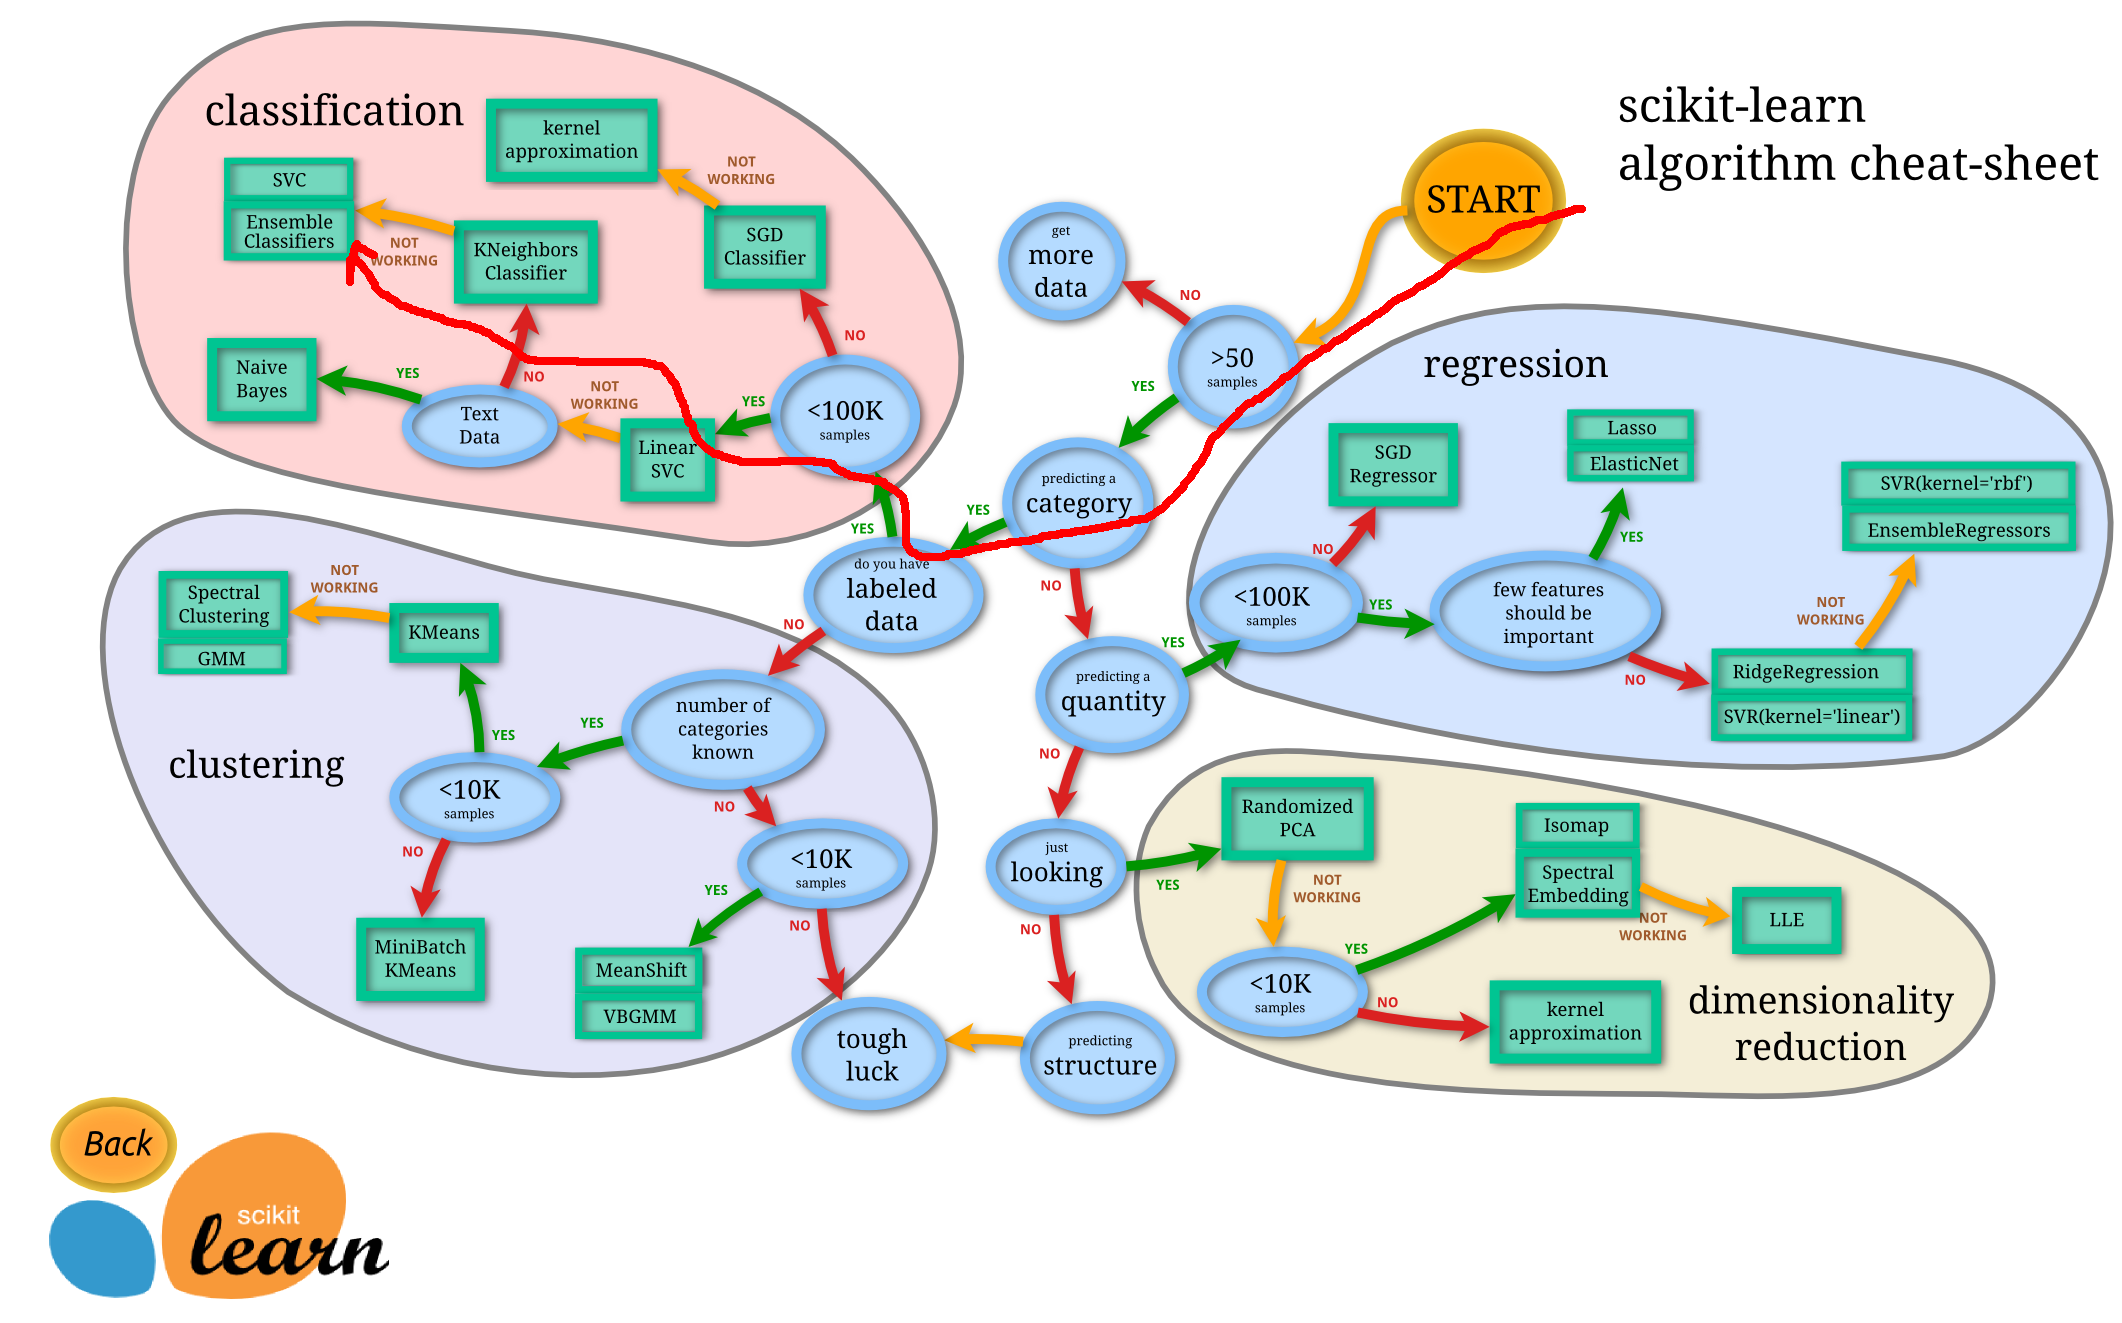

## Fitting Model to a Data using fit(X_train, y_train)

In [2]:
#Try Random ForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the Model to the data(training the machine learning model)
clf.fit(X_train, y_train)

#Evaluate RandomForestClassifier
clf.score(X_test, y_test)

NameError: name 'np' is not defined

## Make Predictions using machine learning model

Use a trained model to make prediction

2 ways to make prediction
 1. predict()
 2. predict_proba()   

In [10]:
# standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")

In [3]:
#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [5]:
X.shape, y.shape

((303, 13), (303,))

In [6]:
X_train.shape,y_train.shape

((242, 13), (242,))

In [14]:
X_test.shape, y_test.shape

((61, 13), (61,))

In [14]:
# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# prediction result based on test data
y_predict = clf.predict(X_test) 
y_predict

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [22]:
# convert y_test data to array to match with clf.predict(X_test) 
np.array(y_test)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [23]:
#Different ways to make prediction
#1. Method 1
clf.score(X_test, y_test)

0.7704918032786885

In [24]:
#2. Method 2

np.mean(y_predict == y_test)

0.7704918032786885

In [28]:
#3. Method 3
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7704918032786885

In [33]:
# predict_proba () returns probabilities of a  classification label
# probability of 0 or 1 in percentage
# [0.74, 0.26] means 74% chance for 0 and 26 % chance for 1. Overall it is 0
# [0.2 , 0.8 ] means 20% chance for 0 and 80 % chance for 1. Overall it is 1
clf.predict_proba(X_test[:5])

array([[0.74, 0.26],
       [0.62, 0.38],
       [0.2 , 0.8 ],
       [0.32, 0.68],
       [0.46, 0.54]])

In [35]:
# overall probability
clf.predict(X_test[:5])

array([0, 0, 1, 1, 1])

# 4. Evaluating machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
    
    1. Esimator's built-in 'score()' method
    2. The 'scorong' parameter
    3. problem specific metric functions
    
    

## Evaluating using  built-in 'score()' method for Clasifier problem

In [7]:
# standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [8]:
heart_disease = pd.read_csv("heart-disease.csv")

In [9]:
#Try Random ForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the Model to the data(training the machine learning model)
clf.fit(X_train, y_train)



RandomForestClassifier()

In [10]:
#Evaluate RandomForestClassifier
# The highest value for the .score method is 1.0 and lowest is 0.0

# if we apply score against training data , we will get 1.0(100%)
# if taining_data = test_data then we get 1.0(100%)
clf.score(X_train, y_train)


1.0

In [11]:
clf.score(X_test, y_test)

0.8524590163934426

## Evaluating using  built-in 'score()' method for Regression problem

In [12]:

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [13]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])


housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
#Import lgoritm/estimator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create X an y(MedHouseVal Column)
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"] # Median house price in $100,000

#split into training and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


#higher the n_estimators longer to get score.
model = RandomForestRegressor(n_estimators=2)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7000978702214974

In [19]:
#higher the n_estimators longer to get score.

model = RandomForestRegressor(n_estimators=20)
model.fit(X_train, y_train)
#score impoved if we use esimators as 20
model.score(X_test, y_test)

0.7961683731798832

## https://scikit-learn.org/stable/modules/model_evaluation.html


Estimator score method: Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation.

Scoring parameter: Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.

Metric functions: The sklearn.metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.



## 4.2 Evaluating a model using scoring parameter

In [29]:

from sklearn.model_selection import cross_val_score

#Try Random ForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)
heart_disease = pd.read_csv("heart-disease.csv")

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the Model to the data(training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
#returns only single score
clf.score(X_test, y_test)

0.8524590163934426

In [34]:
# return cv number of scores in an array.
# cv stands for cross validation
# evaluate score by cross validation
cross_val_score(clf, X, y, cv= 5)

array([0.83606557, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

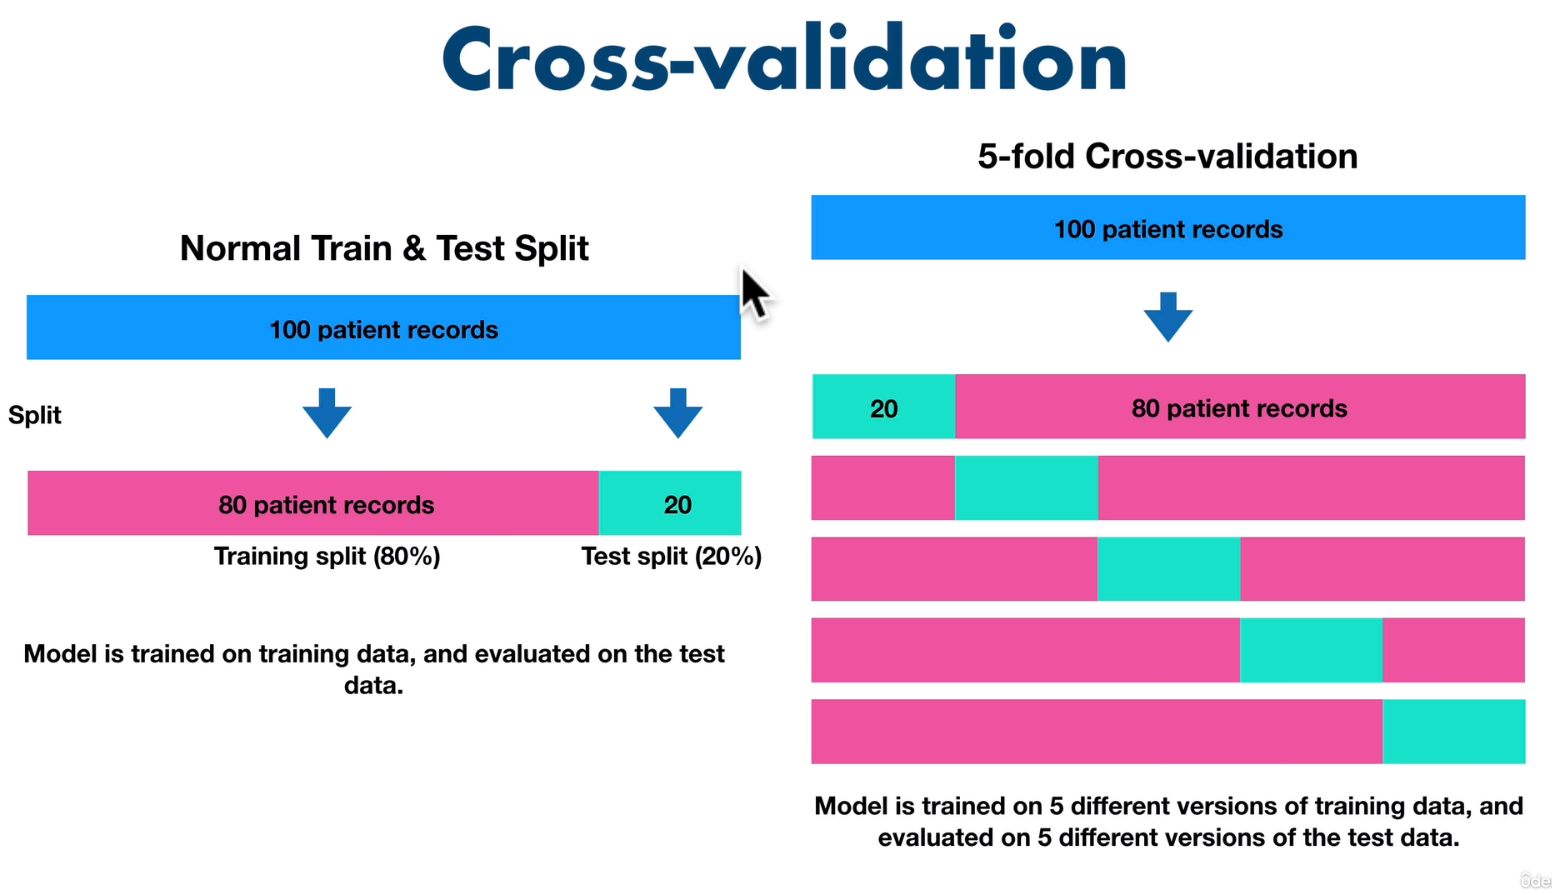


In [35]:
#What does cross validation do if the cross validation is 5(cv=5) and  the number records in the data set is 100?
# 1. Take first 20 of data is used in the test and remaining used for trainng
# 2. 20-40 rows of data for test and  remainng for training
# 3. 40-60 rows of data for test and  remainng for training
# 4. 60-80 rows of data for test and  remainng for training
# 5. 80-110 rows of data for test and  remainng for training

# Model is trained on 5 different versions of training data and evaluated on 5 different version of the test data.

# return cv number of scores in an array.
# cv stands for cross validation
# evaluate score by cross validation
cross_val_score(clf, X, y, cv= 5)

array([0.83606557, 0.86885246, 0.80327869, 0.85      , 0.76666667])

In [36]:
# compare singl score and mean score of cross vaidation score
single_score = clf.score(X_test, y_test)
mean_cross_validation_score = np.mean(cross_val_score(clf, X, y, cv= 5))

single_score, mean_cross_validation_score

(0.8524590163934426, 0.8314754098360655)